# <center>Rozwiązywanie układów równań</center>

Instrukcja:
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi (w postaci kodu) z komentarzami w środowisku Jupyter Notebook i umieścić je na platformie e-learningowej.   

In [2]:
import main
import scipy as sp
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

**Cel zajęć:** Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania układów równań liniowych w postaci macierzowej, z rzadkimi macierzami prostokątnymi. Czyli dana jest macierz $\mathbf{A}$ prostokątna o wymiarach ($m\times n$) i [rzadka](https://pl.wikipedia.org/wiki/Macierz_rzadka) oraz wektor $\mathbf{b}$ ($m\times 1$), należy rozwiązać układ równań postaci:    
$
\mathbf{Ax}=\mathbf{b}
$ 
  
gdzie $\mathbf{A}$ to macierz współczynników z lewej strony równania, wektor $\mathbf{x}$ jest wektorem zmiennych a wektor $\mathbf{b}$ wyników prawej strony równania.  

Do oceny jakości rozwiązania będziemy wykorzystywać residuum (ang. *residual*)
$
\mathbf{r}=\mathbf{b}-\mathbf{Ax}
$ 
  

***Zadanie 1***   
Dane jest $m = 50$ oraz $n = 12$. 
  
Rozwiąż układ równań $\mathbf{Ax}=\mathbf{b}$ postaci:
$$
\left[\begin{matrix}
1 & t_0 & t_{0}^{2} & \cdots & t_{0}^{n-1} \\
1 & t_1 & t_{1}^{2} & \cdots & t_{1}^{n-1} \\
1 & t_2 & t_{2}^{2} & \cdots & t_{2}^{n-1} \\
\vdots & \cdots & \ddots & \cdots & \vdots \\
1 & t_{m-1} & t_{m-1}^{2} & \cdots & t_{m-1}^{n-1} 
\end{matrix}\right]
\left[\begin{matrix}
x_0\\
x_1\\
x_2\\
\vdots\\
x_{n-1}
\end{matrix}\right] =
\left[\begin{matrix}
b_0\\
b_1\\
b_2\\
\vdots\\
b_{m-1}
\end{matrix}\right]
$$ 
za pomocą następujacych metod:

1. Przekształcenia układu równań do postaci: $\mathbf{A}^{\mathrm{T}}\mathbf{Ax}=\mathbf{A}^{\mathrm{T}}\mathbf{b}$ (zdefinuj funkcję *square_from_rectan* która przekształci odpowiednio macierz A i wektor b)  i stosując funkcję solve, z poprzednich zajęć.
2. Domyślnej metody Pythona rozwiązywania układów równań z macierzą prostokątną [lstsq](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linalg.lstsq.html#numpy-linalg-lstsq).  
3. Rozkładu QR rozwiązywania układów równań podanego na wykładzie. Do dokonania rozkładu QR w Pythonie używa się funkcji [qr](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.qr.html), natomiast do rozwiązywania układu równań z macierzą trójkątną służy funkcja [solve_triangular](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.solve_triangular.html)
4. Metody rozkładu SVD rozwiązywania układów równań podanego na wykładzie.
5. Porównaj czasy wykonania wszystkich metod oraz zużycie pamięci.
6. Porównaj jakość otrzymanych wyników

In [33]:
from main import square_from_rectan, residual_norm
%load_ext line_profiler
%load_ext memory_profiler
import memory_profiler

#1
m = 50
n = 12
A = np.random.rand(m,n)
b = np.random.rand(m)

def solve(A, b):
    macierz, wektor = square_from_rectan(A, b)
    wynik = np.linalg.solve(macierz, wektor)
    return wynik


x1 = solve(A, b)
residuum_x1 = residual_norm(A, x1, b)

czas1 = %timeit -r 10 -n 100 -o solve(A, b)
pamiec1 = %memit -o  solve(A, b)

print('Norma residuum:', residuum_x1)


The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler
The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler
18.1 µs ± 2.15 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)
peak memory: 116.89 MiB, increment: 0.00 MiB
Norma residuum: 1.7503070107795777


In [34]:
# 2
def lstsq(m, v):
    res = np.linalg.lstsq(m, v, rcond=-1)[0]
    return res

x2 = lstsq(A, b)
residuum_x2 = residual_norm(A, x2, b)

czas2 = %timeit -r 10 -n 100 -o lstsq(A, b)
pamiec2 = %memit -o lstsq(A, b)
print('Norma residuum:', residuum_x2)

59.8 µs ± 11.7 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)
peak memory: 116.89 MiB, increment: 0.00 MiB
Norma residuum: 1.7503070107795775


In [35]:
#3
def qr(m, v):
    q, r = np.linalg.qr(m)
    res = sp.linalg.solve_triangular(r, q.T @ v)
    return res

x3 = qr(A, b)
residuum_x3 = residual_norm(A, x3, b)

czas3 = %timeit -r 10 -n 100 -o qr(A, b)
pamiec3 = %memit -o qr(A, b)
print('Norma residuum:', residuum_x3)

79.2 µs ± 13 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)
peak memory: 116.89 MiB, increment: 0.00 MiB
Norma residuum: 1.7503070107795777


In [36]:
#4
def svd(m, v):
    U, S, V = np.linalg.svd(m, full_matrices=False)
    S = np.diag(S)
    res = V.T @ np.linalg.solve(S, U.T @ v)
    return res

x4 = svd(A, b)
residuum_x4 = residual_norm(A, x4, b)

czas4 = %timeit -r 10 -n 100 -o svd(A, b)
pamiec4 = %memit -o svd(A, b)
print('Norma residuum:', residuum_x4)

87.1 µs ± 8.04 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)
peak memory: 116.89 MiB, increment: 0.00 MiB
Norma residuum: 1.7503070107795775


5 i 6
Z moich obliczeń wynika, że najszybszym sposobem na rozwiązanie równania Ax = b jest przekształcenie macierzy prostokątnej na macierz kwadratową. Jeśli bierzemy pod uwagę pamięć zużytą przez każdy sposób oraz dokładność, okazuje się że te wartości są prawie identyczne. Odpowiedzi na te pytania pozwoliły mi funkcje takie jak timeit, memit oraz zaimplementowana przeze mnie funkcja residual_norm.

***Zadanie 2***

Utwórz dwa wektory $x_1$ oraz $x_2$ opiujące dochód i wydatki pewnego gospodarstwa.

Dochody = [210, 270, 290, 310, 370, 400, 450, 480, 510, 520]

Wydatki = [140, 190, 250, 270, 290, 310, 340, 360, 420, 390]

Utwórz regresję liniową zależności wydatków od dochodów.

Jaki jest błąd uzyskanej prostej względem danych? Czy jest możliwość uzyskania lepszego wyniku?

W celu wyznaczenia współczynników wykorzystaj niniejszą informację https://en.wikipedia.org/wiki/Simple_linear_regression


Współczynniki wyliczone za pomocą macierzy rzadkiej: a = [23.08251017], b = [1.20918071]
Współczynniki wyliczone za pomocą funkcji polyval: a = 23.08251016850668, b = 1.20918070889018


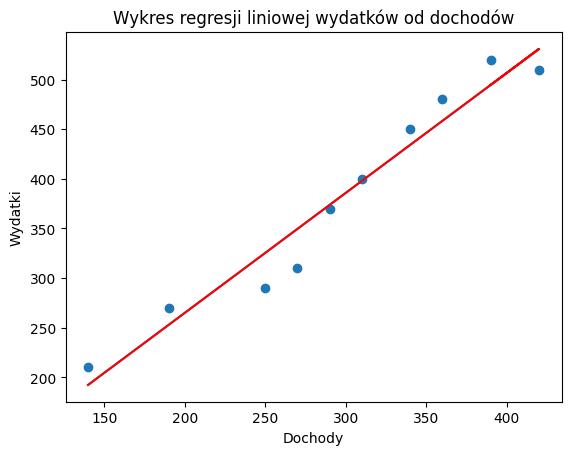

In [3]:
x1 = np.array([140, 190, 250, 270, 290, 310, 340, 360, 420, 390])
x2 = np.array([210, 270, 290, 310, 370, 400, 450, 480, 510, 520])

d = np.polyfit(x1, x2, 1)

x1 = x1.reshape(10, 1)
x2 = x2.reshape(10, 1)
one = np.ones((10, 1))

x1_m = np.concatenate((one, x1), axis=1)
q, r = np.linalg.qr(x1_m)
m = sp.linalg.solve_triangular(r, q.T @ x2)

y_a = m[0] + m[1] * x1
y_b = d[0] * x1 + d[1]

fig1, ax = plt.subplots()
ax.scatter(x1, x2)
ax.plot(x1, y_a)
ax.plot(x1, y_b,'r')
ax.set_title('Wykres regresji liniowej wydatków od dochodów')
ax.set(xlabel='Dochody', ylabel='Wydatki')

print(f'Współczynniki wyliczone za pomocą macierzy rzadkiej: a = {m[0]}, b = {m[1]}')
print(f'Współczynniki wyliczone za pomocą funkcji polyval: a = {d[1]}, b = {d[0]}')

Wyniki powstałe przy pomocy macierzy rzadkiej są podobne do tych utworzonych z funkcji polyfit. Przez to mogę stwierdzić, że linia regresji nie jest obarczona dużym błędem obliczeniowym.

***Zadanie 3***  

1. Przy użyciu funkcji [random.normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) wygeneruj trzy wektory $x_1$, $x_2$ oraz $\epsilon$ o wymiarze (100,1) o wartości średniej równej 0 oraz odchyleniu standardowemu równego 1.
2. Przy pomocy funkcji [concatenate](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html) połącz wektor samych jedynek o wymiarze (100,1) z:

- $x_1$,
- $x_2$,
- $x_1$ i $x_2$
- $x_1$, $x_2$ i $x_1 * x_2$

z parametrem *axis = 1*. To zadanie jest przygotowaniem struktury danych potrzebnych przy regresji liniowej w dalszej części zadania.


3. Na podstawie wektoró z punktu 1 wylicz wartości wektora $y$ danego wzorem:
$$
    y=2+x_1-0.5x_2+\epsilon
$$

Dla lepszego zobrazowania problemu należy spojrzeć na niego w sposób następujący:
 - $y$ - proces który chcemy w dalszej części zadania zamodelować, a którego dokładnego opisu nie znamy
 - $x_1, x_2$ - zmienne niezależne które jesteśmy w stanie mierzyć i wiemy że wpływają na proces
 - $\epsilon$ - zakłócenie procesu




4. W zależności od możliwości pomiaru zmiennych niezależnych można podjąć próbę zamodelowania procesu, na potrzeby ćwiczenia wykorzystana zostanie [regresja liniowa](https://pl.wikipedia.org/wiki/Regresja_liniowa). Zakładając że dostępne dane to wektor wartości $y$ i odpowiednio wektor $x_1$ lub $x_2$ do obliczenia jej współczynników można użyć rozkładu QR. Aby to zrobić należy przyjąć hipotetyczny model procesu (wzory 1-4) i potraktować "zmierzone" i podstawione do wzoru dane jako układ równań

 Korzystając z macierzy z punktu 3 oblicz współczynniki regresji liniowej z wykorzystaniem rozkładu QR, dla  modeli procesu opisanych w następujacy sposób:

 $$ \hat{y} \sim a + z_1 + z_2 + ... + z_n$$
 Gdzie:
 - $\hat{y}$ - przybliżenie modelowanego procesu
 - $a$ - wyraz wolny
 - $z_1 + z_2 + ... + z_n$ - zmienne niezależne, których ilość dobiera się na podstawie dostępnych danych, tak aby otrzymać jak najlepszy model

Celem regresji jest dobranie takich współczynników zmiennych niezależnych i wyrazu wolnego, aby zaproponowany model jak najbliżej odwzorowywał pierwotny procecs.


Modele do przeprowadzenia eksperymentów:
 1. $\hat{y}\sim a+x_1$   
 2. $\hat{y}\sim a+x_2$
 3. $\hat{y}\sim a+x_1+x_2$
 4. $\hat{y}\sim a+x_1+x_2+x_1*x_2$

  
5. Przeanalizuj (znanymi metrykami) i przedstaw otrzymane wyniki na odpowiednich subplotach.

Wektor y wynosi:  [[ 1.66052415]
 [ 2.87543899]
 [-0.60174741]
 [ 3.83916292]
 [ 0.91415558]
 [ 3.56774181]
 [ 0.47393094]
 [ 1.41195716]
 [ 2.61161689]
 [ 1.28468807]
 [ 2.36835136]
 [-1.10959969]
 [ 1.61408983]
 [ 4.76321619]
 [ 2.90945116]
 [ 1.36083632]
 [ 2.85002965]
 [ 2.43176581]
 [ 0.04074683]
 [ 1.5015159 ]
 [ 1.5391153 ]
 [ 1.50995469]
 [ 1.35335168]
 [ 1.55939674]
 [ 5.27431341]
 [ 1.38801865]
 [ 1.72779368]
 [ 6.04743982]
 [ 2.60407379]
 [ 1.61034686]
 [ 2.37344926]
 [ 0.2349763 ]
 [ 2.99160091]
 [ 1.09844713]
 [ 5.42514172]
 [ 3.35696812]
 [ 3.0252876 ]
 [ 2.14664744]
 [ 2.40130641]
 [ 1.95498602]
 [-0.97629355]
 [ 4.00176384]
 [ 2.71989087]
 [ 1.84792666]
 [ 1.26703942]
 [ 4.57696443]
 [ 4.15742928]
 [ 1.04205955]
 [ 2.96818546]
 [ 1.54795781]
 [-0.76354398]
 [ 1.31631675]
 [ 2.65503743]
 [-0.44285607]
 [ 0.9119531 ]
 [ 2.41504039]
 [ 3.20181043]
 [ 0.09128197]
 [ 3.48924822]
 [ 2.58785596]
 [ 4.19067007]
 [ 0.92988701]
 [ 2.65851638]
 [ 2.30067369]
 [ 4.57978391]
 [-1.43

[Text(0.5, 0, 'x1'), Text(0, 0.5, 'y')]

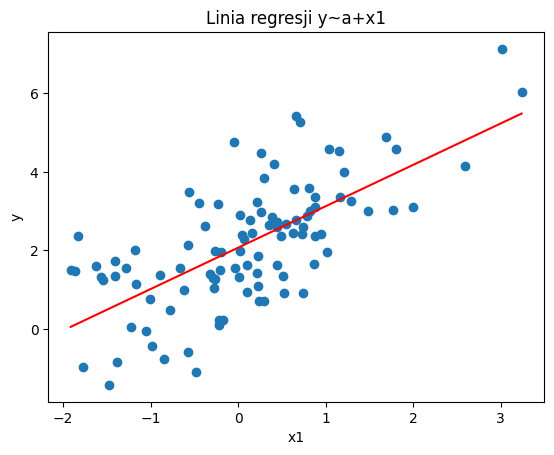

In [5]:
#1
x1 = np.random.normal(0, 1, size=(100, 1))
x2 = np.random.normal(0, 1, size=(100, 1))
e = np.random.normal(0, 1, size=(100, 1))

#2
wektor_jedynek = np.ones([100, 1])
x3 = np.concatenate([wektor_jedynek, x1], axis=1)
x4 = np.concatenate([wektor_jedynek, x2], axis=1)
x5 = np.concatenate([wektor_jedynek, x1, x2], axis=1)
x6 = np.concatenate([wektor_jedynek, x2, x2], axis=1)

#3
y = 2 + x1 - 0.5 * x2 + e
print ('Wektor y wynosi: ', y)

#4 i 5
p1 = [min(x1), max(x1)]
p2 = [min(x2), max(x2)]
q, r = np.linalg.qr(x3)
b = sp.linalg.solve_triangular(r, q.T @ y)
y1 = b[0] + b[1] * p1

fig2, ax = plt.subplots()
ax.scatter(x1, y)
ax.plot(p1, y1, 'r')
ax.set_title('Linia regresji y~a+x1')
ax.set(xlabel='x1', ylabel='y')


[Text(0.5, 0, 'x2'), Text(0, 0.5, 'y')]

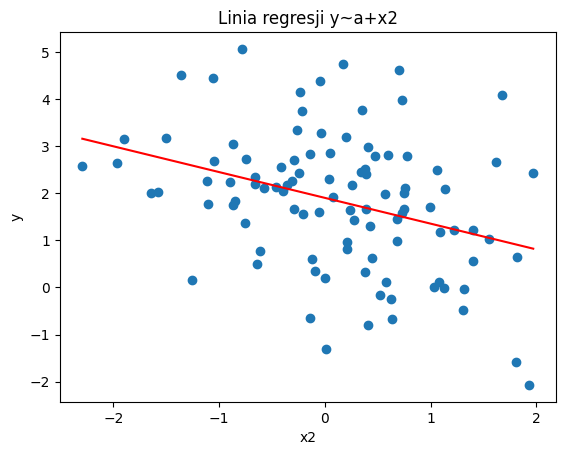

In [82]:
q, r = np.linalg.qr(x4)
b = sp.linalg.solve_triangular(r, q.T @ y)
y2 = b[0] + b[1] * p2

fig3, ax = plt.subplots()
ax.scatter(x2, y)
ax.plot(p2, y2, 'r')
ax.set_title('Linia regresji y~a+x2')
ax.set(xlabel='x2', ylabel='y')

[Text(0.5, 0, 'x1'), Text(0.5, 0.5, 'x2'), Text(0.5, 0, 'y')]

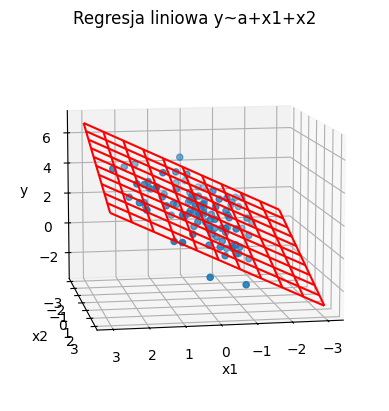

In [83]:
q, r = np.linalg.qr(x5)
b = sp.linalg.solve_triangular(r, q.T @ y)
X, Y = np.meshgrid(np.linspace(-3, 3, 1000), np.linspace(-3, 3, 1000))

y3 = b[0] + b[1] * X + b[2] * Y

fig4 = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, y3, color='r', rstride=100, cstride=100)
ax.scatter(x1, x2, y)
ax.view_init(10, 80)
ax.set_title('Regresja liniowa y~a+x1+x2')
ax.set(xlabel='x1', ylabel='x2', zlabel='y')

[Text(0.5, 0, 'x2'), Text(0.5, 0.5, 'x2'), Text(0.5, 0, 'y')]

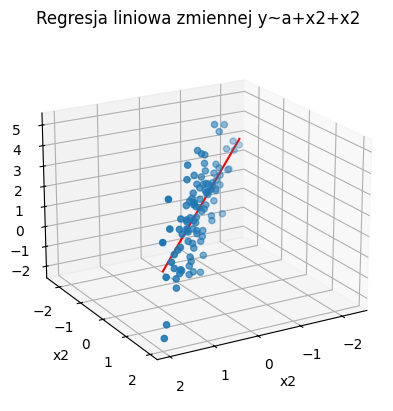

In [87]:
q, r = np.linalg.qr(x6)
b = sp.linalg.solve_triangular(r, q.T @ y)
X, Y = np.meshgrid(np.linspace(-3, 3, 1000), np.linspace(-3, 3, 1000))
p = np.array([p2[0][0], p2[1][0]])
y4 = b[0] + b[1] * p + b[2] * p
fig5 = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(x2, x2, y)
ax.plot(xs=p, ys=p, zs=y4, color='r')
ax.view_init(20, 60)
ax.set_title('Regresja liniowa zmiennej y~a+x2+x2')
ax.set(xlabel='x2', ylabel='x2', zlabel='y')

Jak widać na powyższych wykresach, wyznaczyłem linię regresji dla podanych macierzy rzadkich. Wykorzystałem do tego rozkład QR. Wykresy są przedstawione w sposób przejrzysty i łatwy do odczytania. 

Wnioski:
Na tych ćwiczeniach nauczyłem się rozwiązywać układy równań Ax = b dla losowych macierzy prostokątnych na wiele sposobów takich jak np. rozkład QR czy przekształcenie macierzy prostokątnych na kwadratowe. Przećwiczyłem również tworzenie linii regresji dla wielu zmiennych, oraz przedstawiać ją w przejrzysty sposób nawet dla wykresów 3D. 

Materiały uzupełniające:
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)